Company SellYourCar is a web platform for publishing annocements for car sell. In offer they have 3 types of car annoucement:
- Basic
- Plus 
- Premium <br>

On the search list first appears offer with bought Premium variant, then Plus and finally Basic. Customers are informed that buying a paid advertisement will increase its effectiveness.
In order to increase the efficiency of promoted sales, the department of customer communication
needs knowledge about how individual products affect advertiser success.
This will help clarify the message about the effectiveness of a Premium or Plus paid advertisement.
- What is the impact of more expensive products on the effectiveness of an advertisement?
- Are there patterns in the data that you would find interesting or unexpected? <br>
- What additional data could be used in the analysis? <br>

## Data preparation

Importing neccesary libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import functools

In [2]:
data = pd.read_csv('adv_car_data.csv', sep=';')

In [3]:
data.head(5)

,ad_id,product_type,man_name,price,digit_zipcode,registration_year,created_date,end_date,search_views,detail_views,days,click_true_rate
0,350625839,Basic,Alpha,16750,5,2013,24.07.2018,24.08.2018,3091.0,123.0,30,0.037803
1,354412280,Basic,Banshee,35950,4,2015,16.08.2018,07.10.2018,3283.0,223.0,52,0.067926
2,349572992,Basic,Banshee,11950,3,1998,16.07.2018,05.09.2018,3247.0,265.0,51,0.081614
3,350266763,Basic,Buffalo,1750,6,2003,20.07.2018,29.10.2018,1856.0,26.0,101,0.014009
4,355688985,Basic,Banshee,26500,3,2014,28.08.2018,08.09.2018,490.0,20.0,12,0.040816


In [4]:
data.isnull().sum()

ad_id                 0
product_type          0
man_name              0
price                 0
digit_zipcode         0
registration_year     0
created_date          0
end_date              0
search_views         10
detail_views         10
days                  0
click_true_rate      24
dtype: int64

Listing rows containing null values to have a look.

In [5]:
data_nulls = data[data.isna().any(axis=1)]

In [6]:
data_nulls

,ad_id,product_type,man_name,price,digit_zipcode,registration_year,created_date,end_date,search_views,detail_views,days,click_true_rate
6738,355684985,Basic,Turismo,5950,8,2009,28.08.2018,28.08.2018,0.0,0.0,0,NaN
10151,363161664,Basic,Comet,4950,3,2011,12.11.2018,01.03.2019,NaN,NaN,109,NaN
19983,360460901,Basic,Banshee,105,7,2004,12.10.2018,12.10.2018,0.0,0.0,-1,NaN
21423,358837372,Basic,Bullet,2999,5,2003,24.09.2018,24.09.2018,NaN,NaN,0,NaN
26122,360460897,Basic,Banshee,22445,7,2011,12.10.2018,12.10.2018,0.0,0.0,0,NaN
27830,358837359,Basic,Bullet,2999,5,2003,24.09.2018,24.09.2018,NaN,NaN,0,NaN
28823,360460890,Basic,Banshee,26445,7,2011,12.10.2018,12.10.2018,0.0,0.0,0,NaN
38923,360471136,Basic,Monster,1500,2,2012,12.10.2018,12.10.2018,0.0,0.0,0,NaN
43222,360493605,Basic,Banshee,37500,3,2002,12.10.2018,12.10.2018,0.0,0.0,0,NaN
47870,358837344,Basic,Bullet,2999,5,2003,24.09.2018,24.09.2018,NaN,NaN,0,NaN


Building custom filter for better insights of the rows.

In [7]:
def conjunction(*conditions):
    return functools.reduce(np.logical_and, conditions)

In [8]:
c1 = data.man_name == 'Comet'
c2 = data.registration_year == 2011
c3 = data.search_views == 0.0
data_filtered = data[conjunction(c1,c2,3)]

In [9]:
data_filtered

,ad_id,product_type,man_name,price,digit_zipcode,registration_year,created_date,end_date,search_views,detail_views,days,click_true_rate
125,364614140,Basic,Comet,7350,8,2011,28.11.2018,14.01.2019,1011.0,73.0,48,0.068595
544,360812444,Basic,Comet,9950,4,2011,16.10.2018,20.10.2018,193.0,10.0,4,0.051813
713,347248410,Basic,Comet,13950,1,2011,04.07.2018,01.08.2018,769.0,93.0,28,0.120936
1060,357124987,Basic,Comet,4999,5,2011,04.09.2018,08.11.2018,1956.0,159.0,65,0.077224
1593,350637188,Basic,Comet,5500,9,2011,24.07.2018,18.08.2018,168.0,2.0,24,0.011905
...,...,...,...,...,...,...,...,...,...,...,...,...
77917,357115431,Basic,Comet,5250,2,2011,04.09.2018,06.09.2018,32.0,2.0,2,0.062500
77980,363579462,Plus,Comet,13850,6,2011,16.11.2018,05.12.2018,6257.0,552.0,19,0.088221
78002,353515379,Basic,Comet,4390,1,2011,08.08.2018,29.08.2018,863.0,7.0,21,0.008111
78037,363141366,Basic,Comet,6800,4,2011,12.11.2018,26.11.2018,1454.0,63.0,14,0.043329


Deciding to fill Nan values with 0.

In [10]:
data.fillna(0, inplace=True)

In [11]:
data.isnull().sum()

ad_id                0
product_type         0
man_name             0
price                0
digit_zipcode        0
registration_year    0
created_date         0
end_date             0
search_views         0
detail_views         0
days                 0
click_true_rate      0
dtype: int64

In [12]:
data.days.value_counts()

 1      2345
 2      2146
 7      2088
 4      2005
 3      1984
        ... 
 126     100
-1        86
 127       8
-3         4
-2         3
Name: days, Length: 131, dtype: int64

In [13]:
data.nsmallest(5,'days')

,ad_id,product_type,man_name,price,digit_zipcode,registration_year,created_date,end_date,search_views,detail_views,days,click_true_rate
7465,360447771,Basic,Monster,24850,8,2017,12.10.2018,12.10.2018,17.0,2.0,-3,0.117647
22571,357509576,Basic,Landstalker,13950,3,2004,08.09.2018,08.09.2018,143.0,5.0,-3,0.034965
28638,362815021,Basic,Bullet,11995,3,2013,08.11.2018,08.11.2018,24.0,0.0,-3,0.000000
43559,355449450,Basic,Patriot,950,9,2003,24.08.2018,24.08.2018,43.0,0.0,-3,0.000000
6796,361528432,Basic,Turismo,16900,7,2015,24.10.2018,25.10.2018,13.0,3.0,-2,0.230769


Converting created_date and end_date columns to date time format to perform subtraction replacing errors from days column. 

In [14]:
data.created_date = pd.to_datetime(data.created_date,infer_datetime_format=True)

In [15]:
data.end_date = pd.to_datetime(data.end_date,infer_datetime_format=True)

In [16]:
days2 = data.end_date - data.created_date

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78321 entries, 0 to 78320
Data columns (total 12 columns):
ad_id                78321 non-null int64
product_type         78321 non-null object
man_name             78321 non-null object
price                78321 non-null int64
digit_zipcode        78321 non-null int64
registration_year    78321 non-null int64
created_date         78321 non-null datetime64[ns]
end_date             78321 non-null datetime64[ns]
search_views         78321 non-null float64
detail_views         78321 non-null float64
days                 78321 non-null int64
click_true_rate      78321 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(5), object(2)
memory usage: 7.2+ MB


Changing dates to integers and comparing results with current days

In [18]:
data['days2'] = days2

In [19]:
data.days2 = data.days2/np.timedelta64(1, 'D')

In [20]:
data.days

0         30
1         52
2         51
3        101
4         12
        ... 
78316     99
78317     25
78318     16
78319     28
78320      1
Name: days, Length: 78321, dtype: int64

Checking if assumption of making calculation is right

In [21]:
comp = data.days - data.days2

In [22]:
comp.value_counts()

 0.0    66468
 1.0     5860
-1.0     5679
-3.0       83
-2.0       81
 2.0       79
 3.0       62
-4.0        6
 4.0        3
dtype: int64

Also adding 1 to each row. Counting of days advertisement starts from 1 even if advertisement was published for 1 sec. The additional reason to do that is to avoid 0 for futhure calculations(division).  

In [23]:
data.days2 = data.days2 + 1

In [24]:
data[data.days2 == 0]

,ad_id,product_type,man_name,price,digit_zipcode,registration_year,created_date,end_date,search_views,detail_views,days,click_true_rate,days2


Dropping unusefull columns.

In [25]:
data.drop('days',axis=1,inplace=True)

Calculating new click true rate because we have all necessary information in dataframe for comparision with existing.

In [26]:
data['click_true_rate2'] = data.detail_views/data.search_views

In [27]:
data.click_true_rate2 = pd.to_numeric(data.click_true_rate2)

In [28]:
comp2 = data.click_true_rate - data.click_true_rate2

In [29]:
comp2.value_counts()

 0.000000e+00    2697
-3.333333e-10     333
 3.333333e-10     283
-4.285714e-10     137
 2.857143e-10     128
                 ... 
-1.634965e-10       1
 3.269917e-10       1
 1.343913e-10       1
-4.434045e-10       1
 2.523659e-10       1
Length: 45358, dtype: int64

In [30]:
data.drop('click_true_rate',axis=1,inplace=True)

Checking if our new ratio has any nulls.

In [31]:
data.isnull().sum()

ad_id                 0
product_type          0
man_name              0
price                 0
digit_zipcode         0
registration_year     0
created_date          0
end_date              0
search_views          0
detail_views          0
days2                 0
click_true_rate2     24
dtype: int64

In [32]:
data.click_true_rate2.fillna(value=0,inplace=True)

Checking for duplicates in advertisements ids.

In [33]:
data.ad_id.value_counts() > 1

359772384     True
360768628     True
360768627     True
364638423     True
350214315     True
             ...  
364332290    False
359232772    False
358552840    False
358548746    False
348782592    False
Name: ad_id, Length: 78305, dtype: bool

In [34]:
ids = data["ad_id"]
data[ids.isin(ids[ids.duplicated()])].sort_values("ad_id")

,ad_id,product_type,man_name,price,digit_zipcode,registration_year,created_date,end_date,search_views,detail_views,days2,click_true_rate2
50392,350214314,Premium,Infernus,8250,5,2012,2018-07-20,2018-07-26,67.0,5.0,7.0,0.074627
39745,350214314,Basic,Infernus,8250,5,2012,2018-07-20,2018-08-01,134.0,10.0,13.0,0.074627
63500,350214315,Basic,Huntley,13650,5,2009,2018-07-20,2018-08-01,368.0,16.0,13.0,0.043478
15997,350214315,Premium,Huntley,13650,5,2009,2018-07-20,2018-07-26,184.0,8.0,7.0,0.043478
39922,354755822,Plus,Banshee,6950,7,2005,2018-08-20,2018-10-18,2827.0,202.0,60.0,0.071454
66323,354755822,Basic,Banshee,6950,7,2005,2018-08-20,2018-10-20,5654.0,404.0,62.0,0.071454
9440,354755824,Basic,Phoenix,10950,7,2010,2018-08-20,2018-10-20,4784.0,222.0,62.0,0.046405
70393,354755824,Plus,Phoenix,10950,7,2010,2018-08-20,2018-10-18,2392.0,111.0,60.0,0.046405
6451,354755829,Basic,Buffalo,10950,7,2009,2018-08-20,2018-10-20,5126.0,242.0,62.0,0.047210
33971,354755829,Plus,Buffalo,10950,7,2009,2018-08-20,2018-10-18,2563.0,121.0,60.0,0.047210


In [35]:
data = data.sort_values(by='ad_id')

In [36]:
data = data.drop_duplicates(subset='ad_id', keep='last')

In [37]:
counts = data.ad_id.value_counts() > 1

In [38]:
counts.value_counts()

False    78305
Name: ad_id, dtype: int64

I decided to keep last rescords beacuse offer could be extended for next period. Those cases could be errors. <br>
I am also adding new ratios for future analyst:
- sv_perD - search views per day
- dv_perD - detail views per day

In [39]:
data['sv_perD'] = data.search_views/data.days2

In [40]:
data['dv_perD'] = data.detail_views/data.days2

In [41]:
data.sort_values(['sv_perD','dv_perD'],ascending=False).head(5)

,ad_id,product_type,man_name,price,digit_zipcode,registration_year,created_date,end_date,search_views,detail_views,days2,click_true_rate2,sv_perD,dv_perD
64208,360493469,Basic,Turismo,100,1,2018,2018-10-12,2018-10-20,96582.0,1559.0,9.0,0.016142,10731.333333,173.222222
5179,363933708,Premium,Monster,4500,2,2015,2018-11-20,2018-12-10,171829.0,6155.0,21.0,0.035820,8182.333333,293.095238
44791,363933706,Premium,Monster,4500,2,2015,2018-11-20,2018-12-10,171168.0,4682.0,21.0,0.027353,8150.857143,222.952381
38966,363933707,Premium,Monster,4500,2,2014,2018-11-20,2018-12-10,158698.0,13926.0,21.0,0.087752,7557.047619,663.142857
74838,359753805,Basic,Comet,199,7,2015,2018-10-04,2019-01-21,608754.0,12286.0,110.0,0.020182,5534.127273,111.690909


Correcting same rows after online reshearch (names of car manufacutrers are faked but research is based on real examples).

In [42]:
data.registration_year.replace(2106,2006,True)

In [43]:
data.registration_year.replace(2020,2002,True)

Adding information about car age, I am assuming that registration year is a year of vehicle registration for the first time after being produced. In registration document this information is included and car usage age is mostly counts from this date.

In [44]:
data['old'] = 2019 - data.registration_year

In [45]:
data.sort_values('registration_year',0,False).head(5)

,ad_id,product_type,man_name,price,digit_zipcode,registration_year,created_date,end_date,search_views,detail_views,days2,click_true_rate2,sv_perD,dv_perD,old
54935,357876989,Basic,Buffalo,38995,3,2019,2018-09-12,2019-01-14,659.0,10.0,125.0,0.015175,5.272000,0.080000,0
877,360080623,Basic,Infernus,25599,7,2019,2018-10-08,2019-01-11,1166.0,14.0,96.0,0.012007,12.145833,0.145833,0
54501,364318894,Basic,Comet,17900,5,2019,2018-11-24,2019-02-08,1848.0,100.0,77.0,0.054113,24.000000,1.298701,0
32797,360812301,Basic,Sultan,14450,9,2019,2018-10-16,2019-02-01,3384.0,75.0,109.0,0.022163,31.045872,0.688073,0
67336,364669997,Basic,Banshee,248341,6,2019,2018-11-28,2019-04-03,19785.0,658.0,127.0,0.033258,155.787402,5.181102,0


# Data visualisation

Now I would like to see what data we have in the database. <br>
Importing libraries and setting font size for better view.

In [46]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.size'] = 12.0

In [47]:
man_count = data.groupby('man_name').ad_id.count() 

In [48]:
man_count_sort = man_count.sort_values(ascending=False)

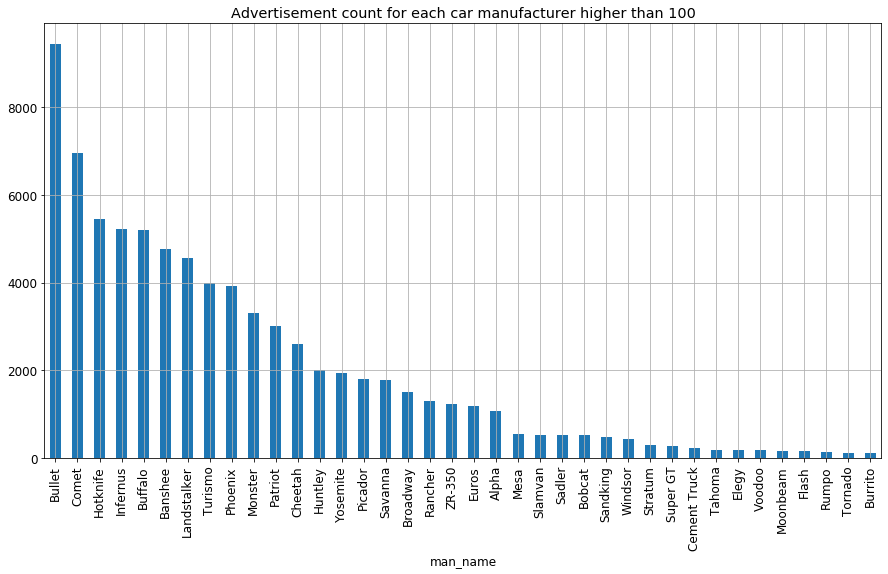

In [102]:
fig = plt.figure(figsize=(15,8))
ax = plt.axes()
ax.set_title('Advertisement count for each car manufacturer higher than 100')

var = man_count_sort[man_count_sort > 100]
var.plot(kind='bar',grid=True)

In [103]:
price_sum = data.groupby('man_name').price.sum()

In [104]:
price_sum_desc = price_sum.sort_values(ascending=False)

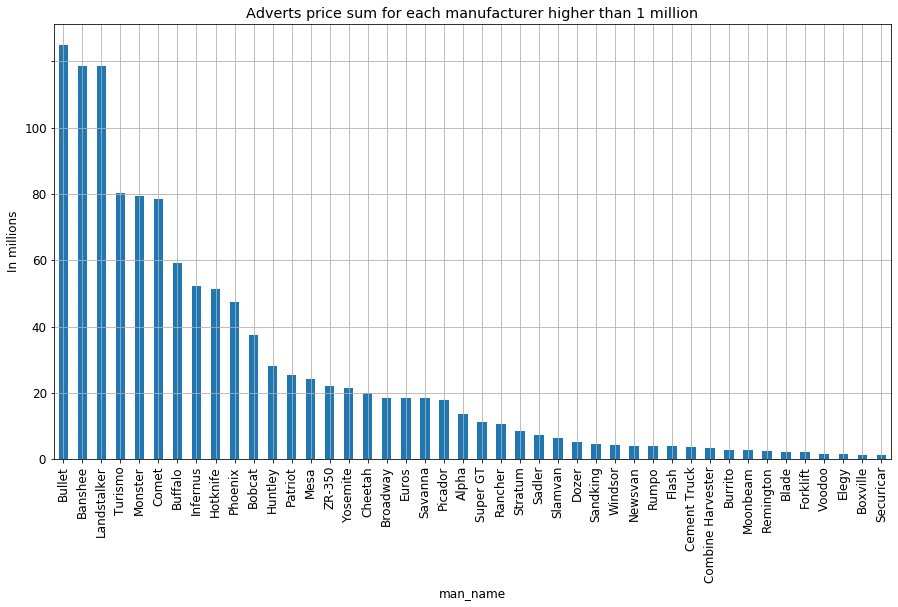

In [105]:
fig = plt.figure(figsize=(15,8))
ax = plt.axes()
ax.set_ylabel('In millions')
ax.set_xlabel('Manufacturer name')
ax.set_title('Adverts price sum for each manufacturer higher than 1 million')

y_vals = ax.get_yticks()
ax.set_yticklabels(['{:2.0f}'.format(x * 100) for x in y_vals])

var = price_sum_desc[price_sum_desc > 1000000]
var.plot(kind='bar',grid=True)

In [79]:
#Graph exporting for presentation usage
fig.tight_layout()
fig.savefig('Adverts price sum for each manufacturer higher than 1 million')

In [106]:
prod_name_sum = data.groupby(['product_type', 'man_name']).price.sum()

In [107]:
prod_name_sum_desc = prod_name_sum.sort_values(ascending=False)

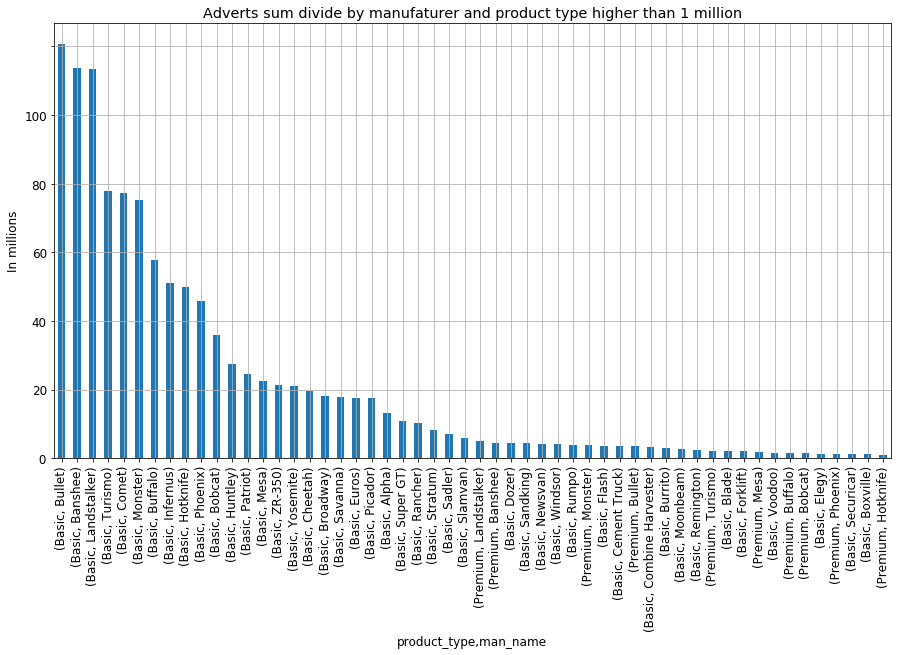

In [108]:
fig = plt.figure(figsize=(15,8))
ax = plt.axes()
ax.set_ylabel('In millions')
ax.set_xlabel('Nazwa marki')
ax.set_title('Adverts sum divide by manufaturer and product type higher than 1 million')

y_vals = ax.get_yticks()
ax.set_yticklabels(['{:2.0f}'.format(x * 100) for x in y_vals])

var = prod_name_sum_desc[prod_name_sum_desc > 1000000]
var.plot(kind='bar',grid=True)

In [109]:
first_reg = data.groupby('registration_year').ad_id.count()

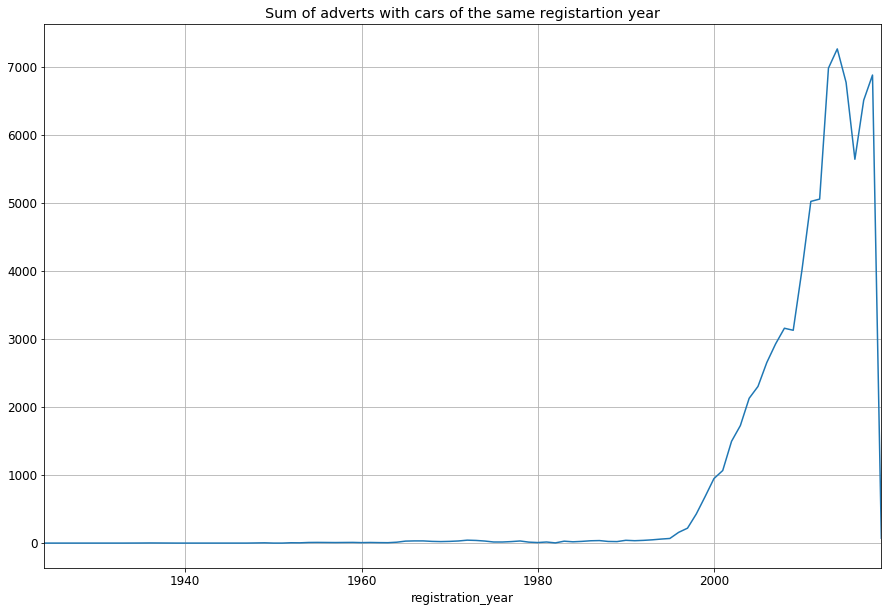

In [110]:
fig = plt.figure(figsize=(15,8))
ax = plt.axes()
ax.set_title("Sum of adverts with cars of the same registartion year")
first_reg.plot(kind='line',grid=True)

In [111]:
data_bef_2000 = data[data.registration_year < 2001]

In [112]:
first_reg_bef_2000 = data_bef_2000.groupby('registration_year').ad_id.count()

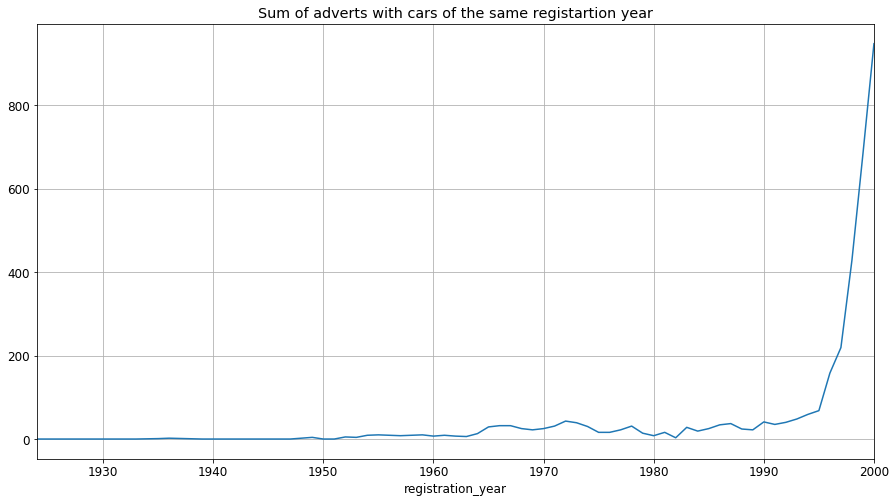

In [113]:
fig = plt.figure(figsize=(15,8))
ax = plt.axes()
ax.set_title("Sum of adverts with cars of the same registartion year")
first_reg_bef_2000.plot(kind='line',grid=True)

In [114]:
dv_perD_mean = data.groupby('man_name').dv_perD.mean()
sv_perD_mean = data.groupby('man_name').sv_perD.mean()

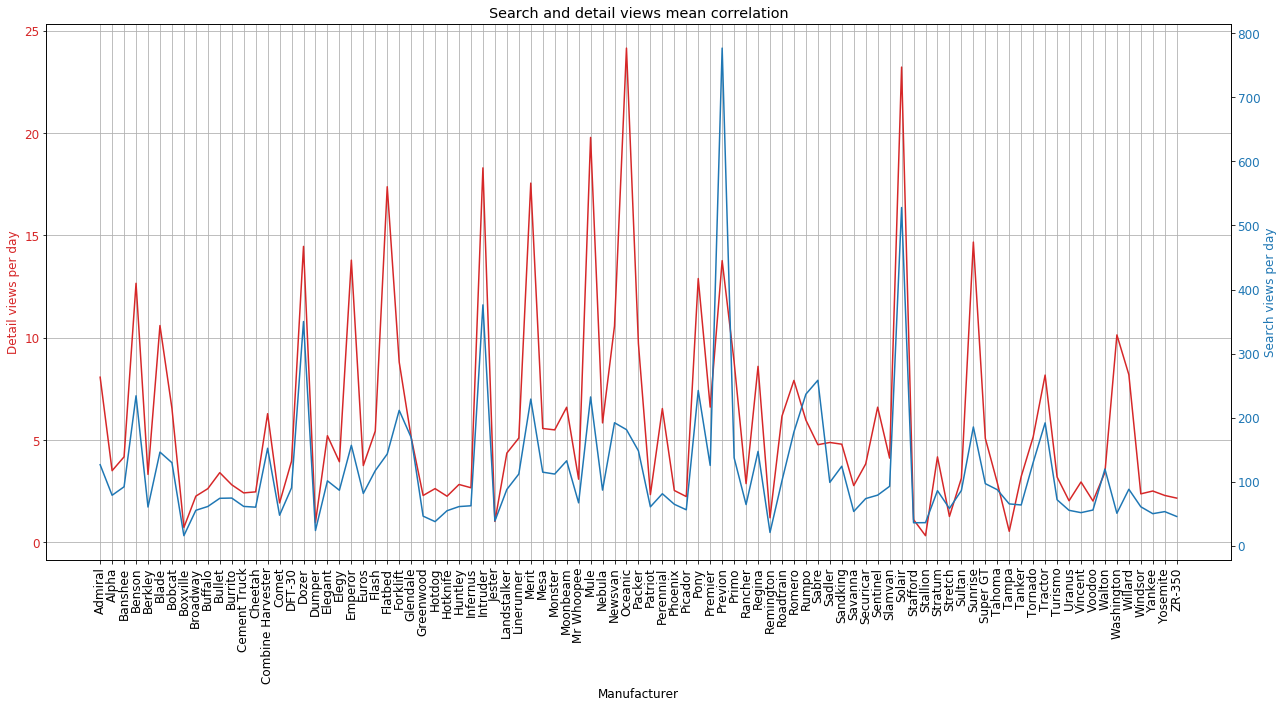

In [115]:
fig,ax1 = plt.subplots(figsize=(18,10))
color = 'tab:red'
ax1.set_xlabel('Manufacturer')
ax1.set_ylabel('Detail views per day', color=color)
ax1.set_title('Search and detail views mean correlation')
ax1.plot(dv_perD_mean, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid()
plt.xticks(rotation='vertical')

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Search views per day', color=color) 
ax2.plot(sv_perD_mean, color=color)
ax2.tick_params(labelcolor=color)

fig.tight_layout()
plt.show()

As we can see in most cases in larger sum of search views implifies larger amout of details views but not all examples are the same, e.g. Oceanic has the highest mean in detail views (red line) but comparing mean search views (blue line) to the rest this number is slighty over comapring to the rest manufacturers.

In [116]:
ctr2_mean = data.groupby('man_name').click_true_rate2.mean()

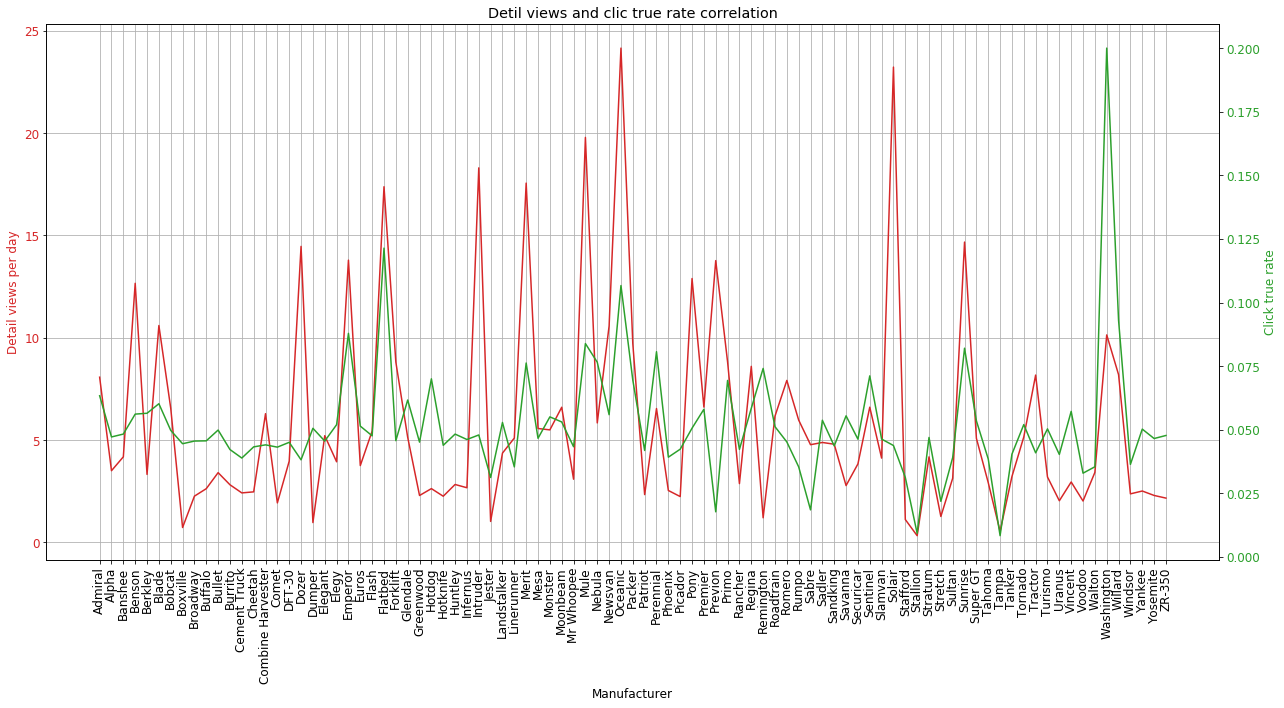

In [117]:
fig,ax1 = plt.subplots(figsize=(18,10))
color = 'tab:red'
ax1.set_xlabel('Manufacturer')
ax1.set_ylabel('Detail views per day', color=color)
ax1.set_title('Detil views and clic true rate correlation')
ax1.plot(dv_perD_mean, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid()
plt.xticks(rotation='vertical')

ax2 = ax1.twinx()

color = 'tab:green'
ax2.set_ylabel('Click true rate', color=color) 
ax2.plot(ctr2_mean, color=color)
ax2.tick_params(labelcolor=color)

fig.tight_layout()
plt.show()

In [110]:
days2_mean = data.groupby('man_name').days2.mean()

In [111]:
days2_mean_sort = days2_mean.sort_values(ascending=False)

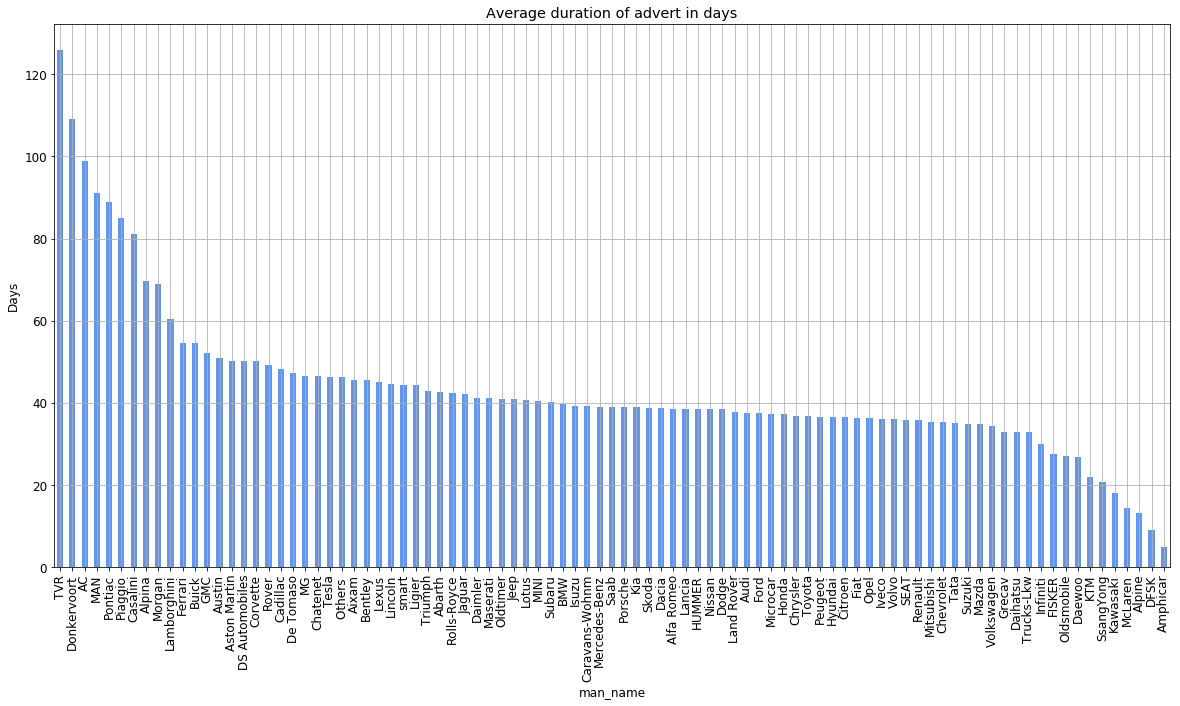

In [112]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes()
ax.set_title('Average duration of advert in days')
ax.set_xlabel('Mmanufacturer')
ax.set_ylabel('Days')
days2_mean_sort.plot(kind='bar',color='cornflowerblue',grid=True,)

In [113]:
detail_view_year = data.groupby('registration_year').detail_views.mean()

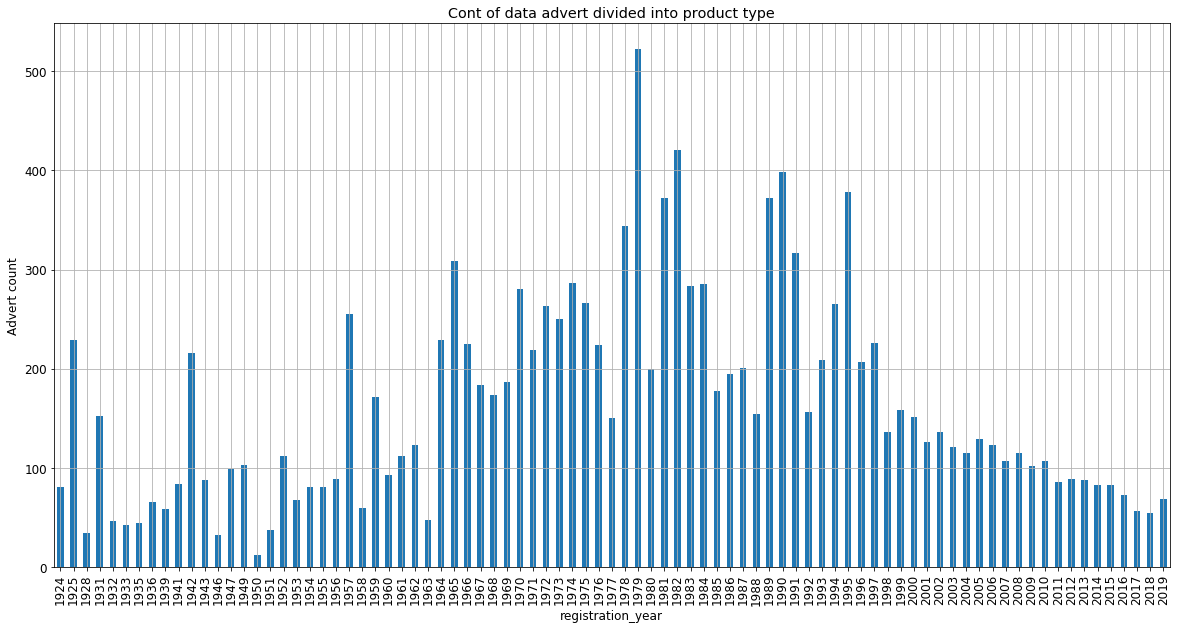

In [115]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes()
ax.set_title('Cont of data advert divided into product type')
ax.set_ylabel('Advert count')
detail_view_year.plot(kind='bar',grid=True)

This plot shows that most of cars listed on the page is quite old. There could be couple reasons for that:
- users can afford for newer car and nows that they can find cheap cars on this pages so sellers nows that they will have higher opportunity to sell car by listing ot on this page,
- this page is focused on selling antique cars and those which will become in  near futture, for reference in Polish law antique cars are those that are older than 25 year (1993 year and older) so maybe this is a rease why we can see peak of cars produced (registered) in 1994,1995 etc, so sellers could buys cars on other markets and sells on this because they nows that can sell it.

Some general statistic.

In [123]:
data.groupby(by='product_type').mean()

,ad_id,price,digit_zipcode,registration_year,search_views,detail_views,days2,click_true_rate2,sv_perD,dv_perD,old
product_type,,,,,,,,,,,
Basic,3.574593e+08,15100.026747,4.644114,2011.122585,1912.083980,82.612780,37.035049,0.047282,58.393167,2.790915,7.877415
Plus,3.590611e+08,12803.772569,4.736111,2009.569444,6719.444444,248.727431,39.875000,0.040991,196.686394,7.489875,9.430556
Premium,3.579878e+08,14625.821983,4.200431,2010.359052,13490.719397,401.613793,34.443966,0.035757,436.887482,13.317104,8.640948


In [124]:
data.groupby(by='product_type').median()

,ad_id,price,digit_zipcode,registration_year,search_views,detail_views,days2,click_true_rate2,sv_perD,dv_perD,old
product_type,,,,,,,,,,,
Basic,358539488.0,10945.0,5.0,2013.0,873.0,34.0,26.0,0.038549,36.387097,1.461538,6.0
Plus,360446961.5,9272.0,5.0,2010.0,4014.5,151.0,30.0,0.037472,152.522417,5.488889,9.0
Premium,359208051.5,9945.0,3.0,2012.0,6956.5,224.0,24.0,0.031137,284.465909,9.274295,7.0


Now I'm plotting data group by product type to it's structure.

In [50]:
product_type_count = data.groupby('product_type').ad_id.count()

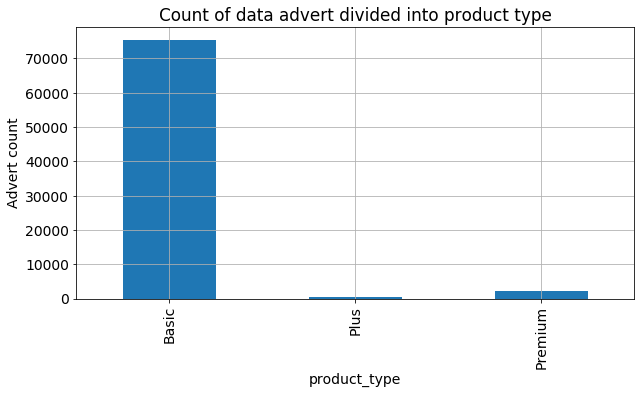

In [51]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
ax.set_title('Count of data advert divided into product type')
ax.set_ylabel('Advert count')
product_type_count.plot(kind='bar',grid=True)

C:\Users\kamilb\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


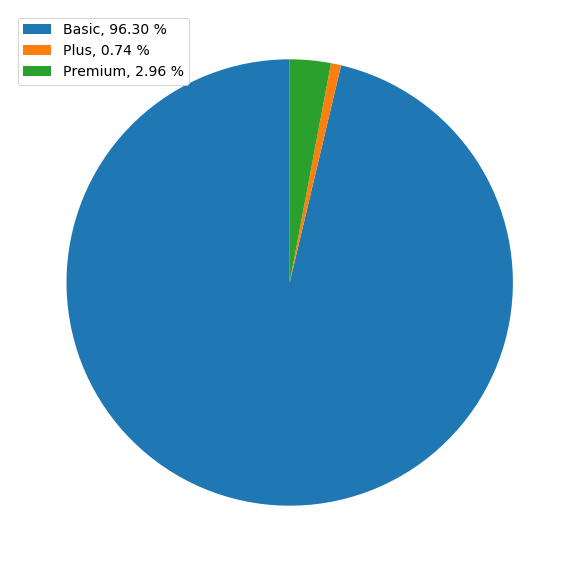

In [52]:
mpl.rcParams['font.size'] = 14.0
fig = plt.figure(figsize=(10,10))
ax = plt.axes()
ax.axis('equal')
plt.pie(product_type_count,startangle=90)
labels=['Basic','Plus','Premium']
sizes = round(product_type_count/sum(product_type_count),4)*100
plt.legend(product_type_count,labels=['%s, %1.2f %%' % (l, s) for l, s in zip(labels, sizes)],loc='upper left')

Those charts above simply represent of the scale of oportunities of increasing sales of Plus and Premium variants.

In [53]:
product_tier_detail_mean = data.groupby('product_type').detail_views.mean()

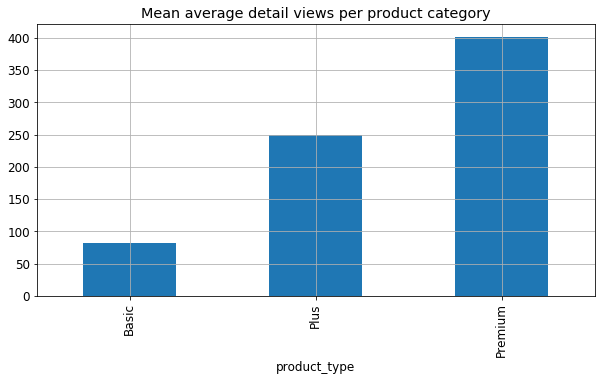

In [54]:
mpl.rcParams['font.size'] = 12.0
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
ax.set_title('Mean average detail views per product category')
ax.set_ylabel('')
product_tier_detail_mean.plot(kind='bar',grid=True)

In [55]:
product_type_search_mean = data.groupby('product_type').search_views.mean()

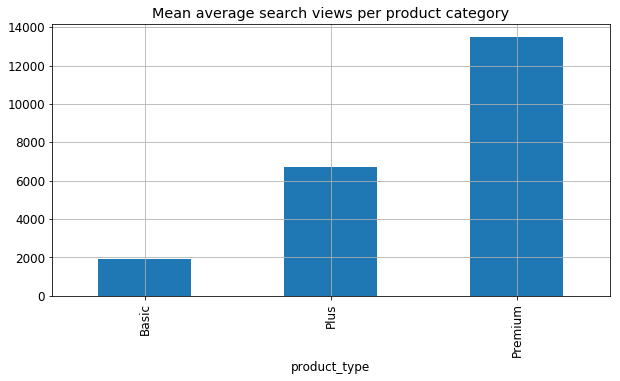

In [56]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
ax.set_title('Mean average search views per product category')
ax.set_ylabel('')
product_type_search_mean.plot(kind='bar',grid=True)

In [57]:
product_type_dv_perD_mean = data.groupby('product_type').dv_perD.mean()

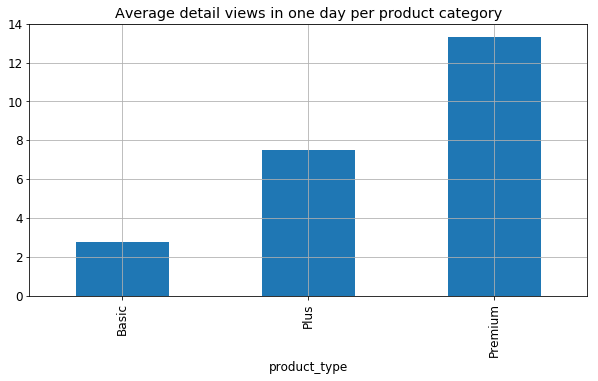

In [58]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
ax.set_title('Average detail views in one day per product category')
ax.set_ylabel('')
product_type_dv_perD_mean.plot(kind='bar',grid=True)

In [59]:
product_type_sv_perD_mean = data.groupby('product_type').sv_perD.mean()

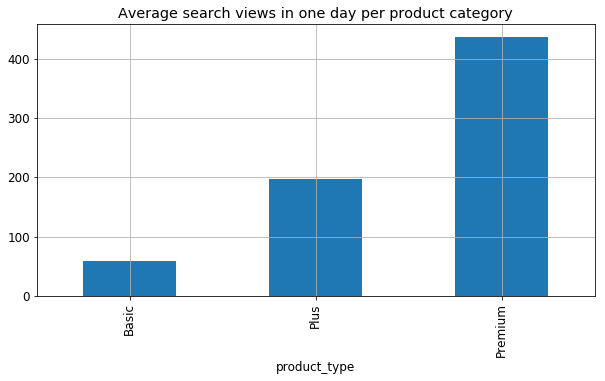

In [60]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
ax.set_title('Average search views in one day per product category')
ax.set_ylabel('')
product_type_sv_perD_mean.plot(kind='bar',grid=True)

Plotting 4 above graphs side by side for better vision.

C:\Users\kamilb\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


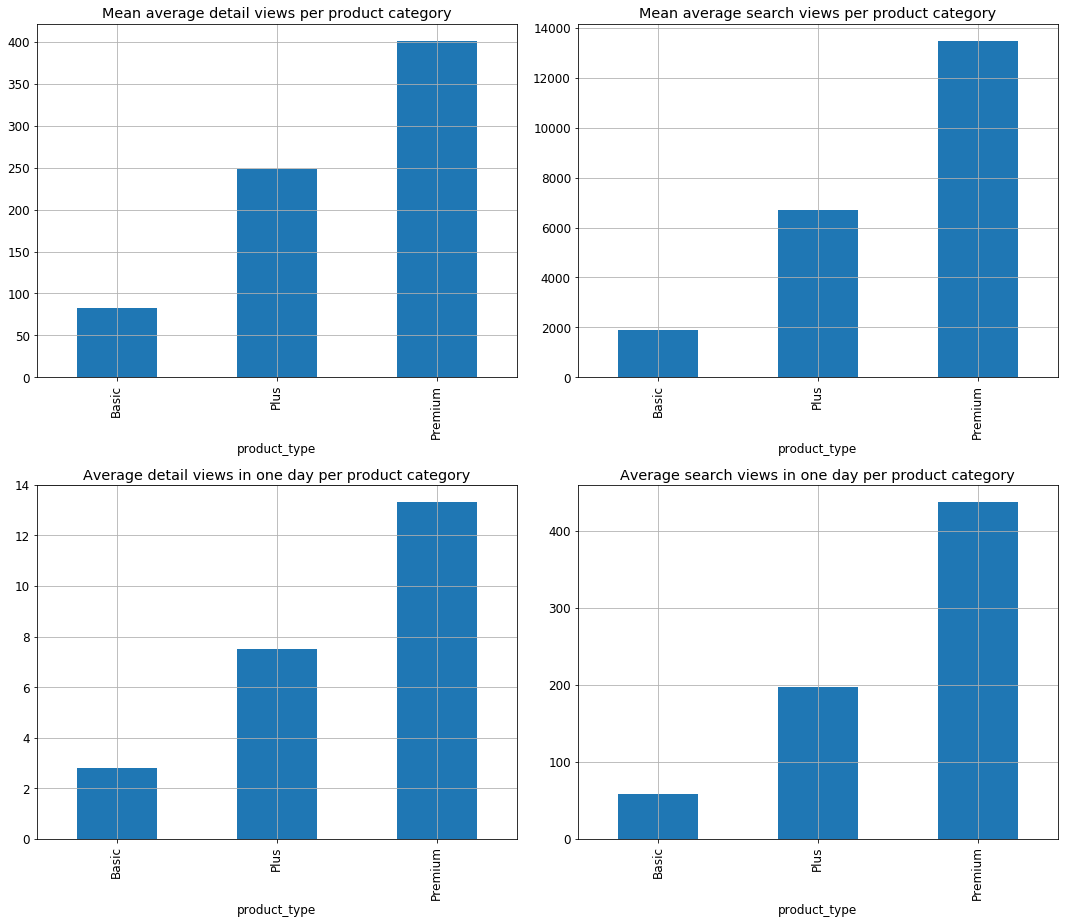

In [117]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,13),tight_layout=True)
p1 = product_tier_detail_mean.plot(kind='bar',grid=True,ax=axes[0,0],title='Mean average detail views per product category')
p2 = product_type_search_mean.plot(kind='bar',grid=True,ax=axes[0,1],title='Mean average search views per product category')
p3 = product_type_dv_perD_mean.plot(kind='bar',grid=True,ax=axes[1,0],title='Average detail views in one day per product category')
p4 = product_type_sv_perD_mean.plot(kind='bar',grid=True,ax=axes[1,1],title='Average search views in one day per product category')

As we can see Plus and Premium variants have big impacts of increasing advertisement detail views so they potentially increasing probability of car selling.

In [49]:
product_type_days_mean = data.groupby('product_type').days2.mean()

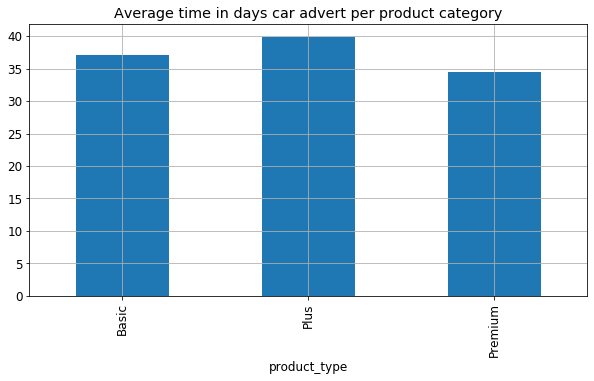

In [50]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
ax.set_title('Average time in days car advert per product category')
ax.set_ylabel('')
product_type_days_mean.plot(kind='bar',grid=True)

Adverts duration for each product category on average is the same.

In [139]:
ctr_mean = data.groupby('product_type').click_true_rate2.mean()

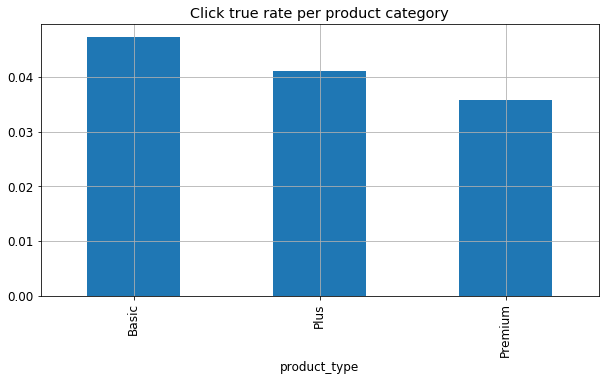

In [140]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
ax.set_title('Click true rate per product category')
ax.set_ylabel('')
ctr_mean.plot(kind='bar',grid=True)

As we can see, click true ratio is descending for more valuable product type. In my opinion Premium and Plus adverts are shown as first in shearch results, so when somebody is looking for car second, third time, he will scroll down without clicking at highlighted onces agian because he knows this offer. So this ratio dosen't giving as any value added information fo futhure analys.

So in my opinion more resumeable is to take detalis views as our target data, because if advertisement is more shown by users the propability of selling this car is higher.

# Searching and taking care of outliers

In [51]:
import seaborn as sns

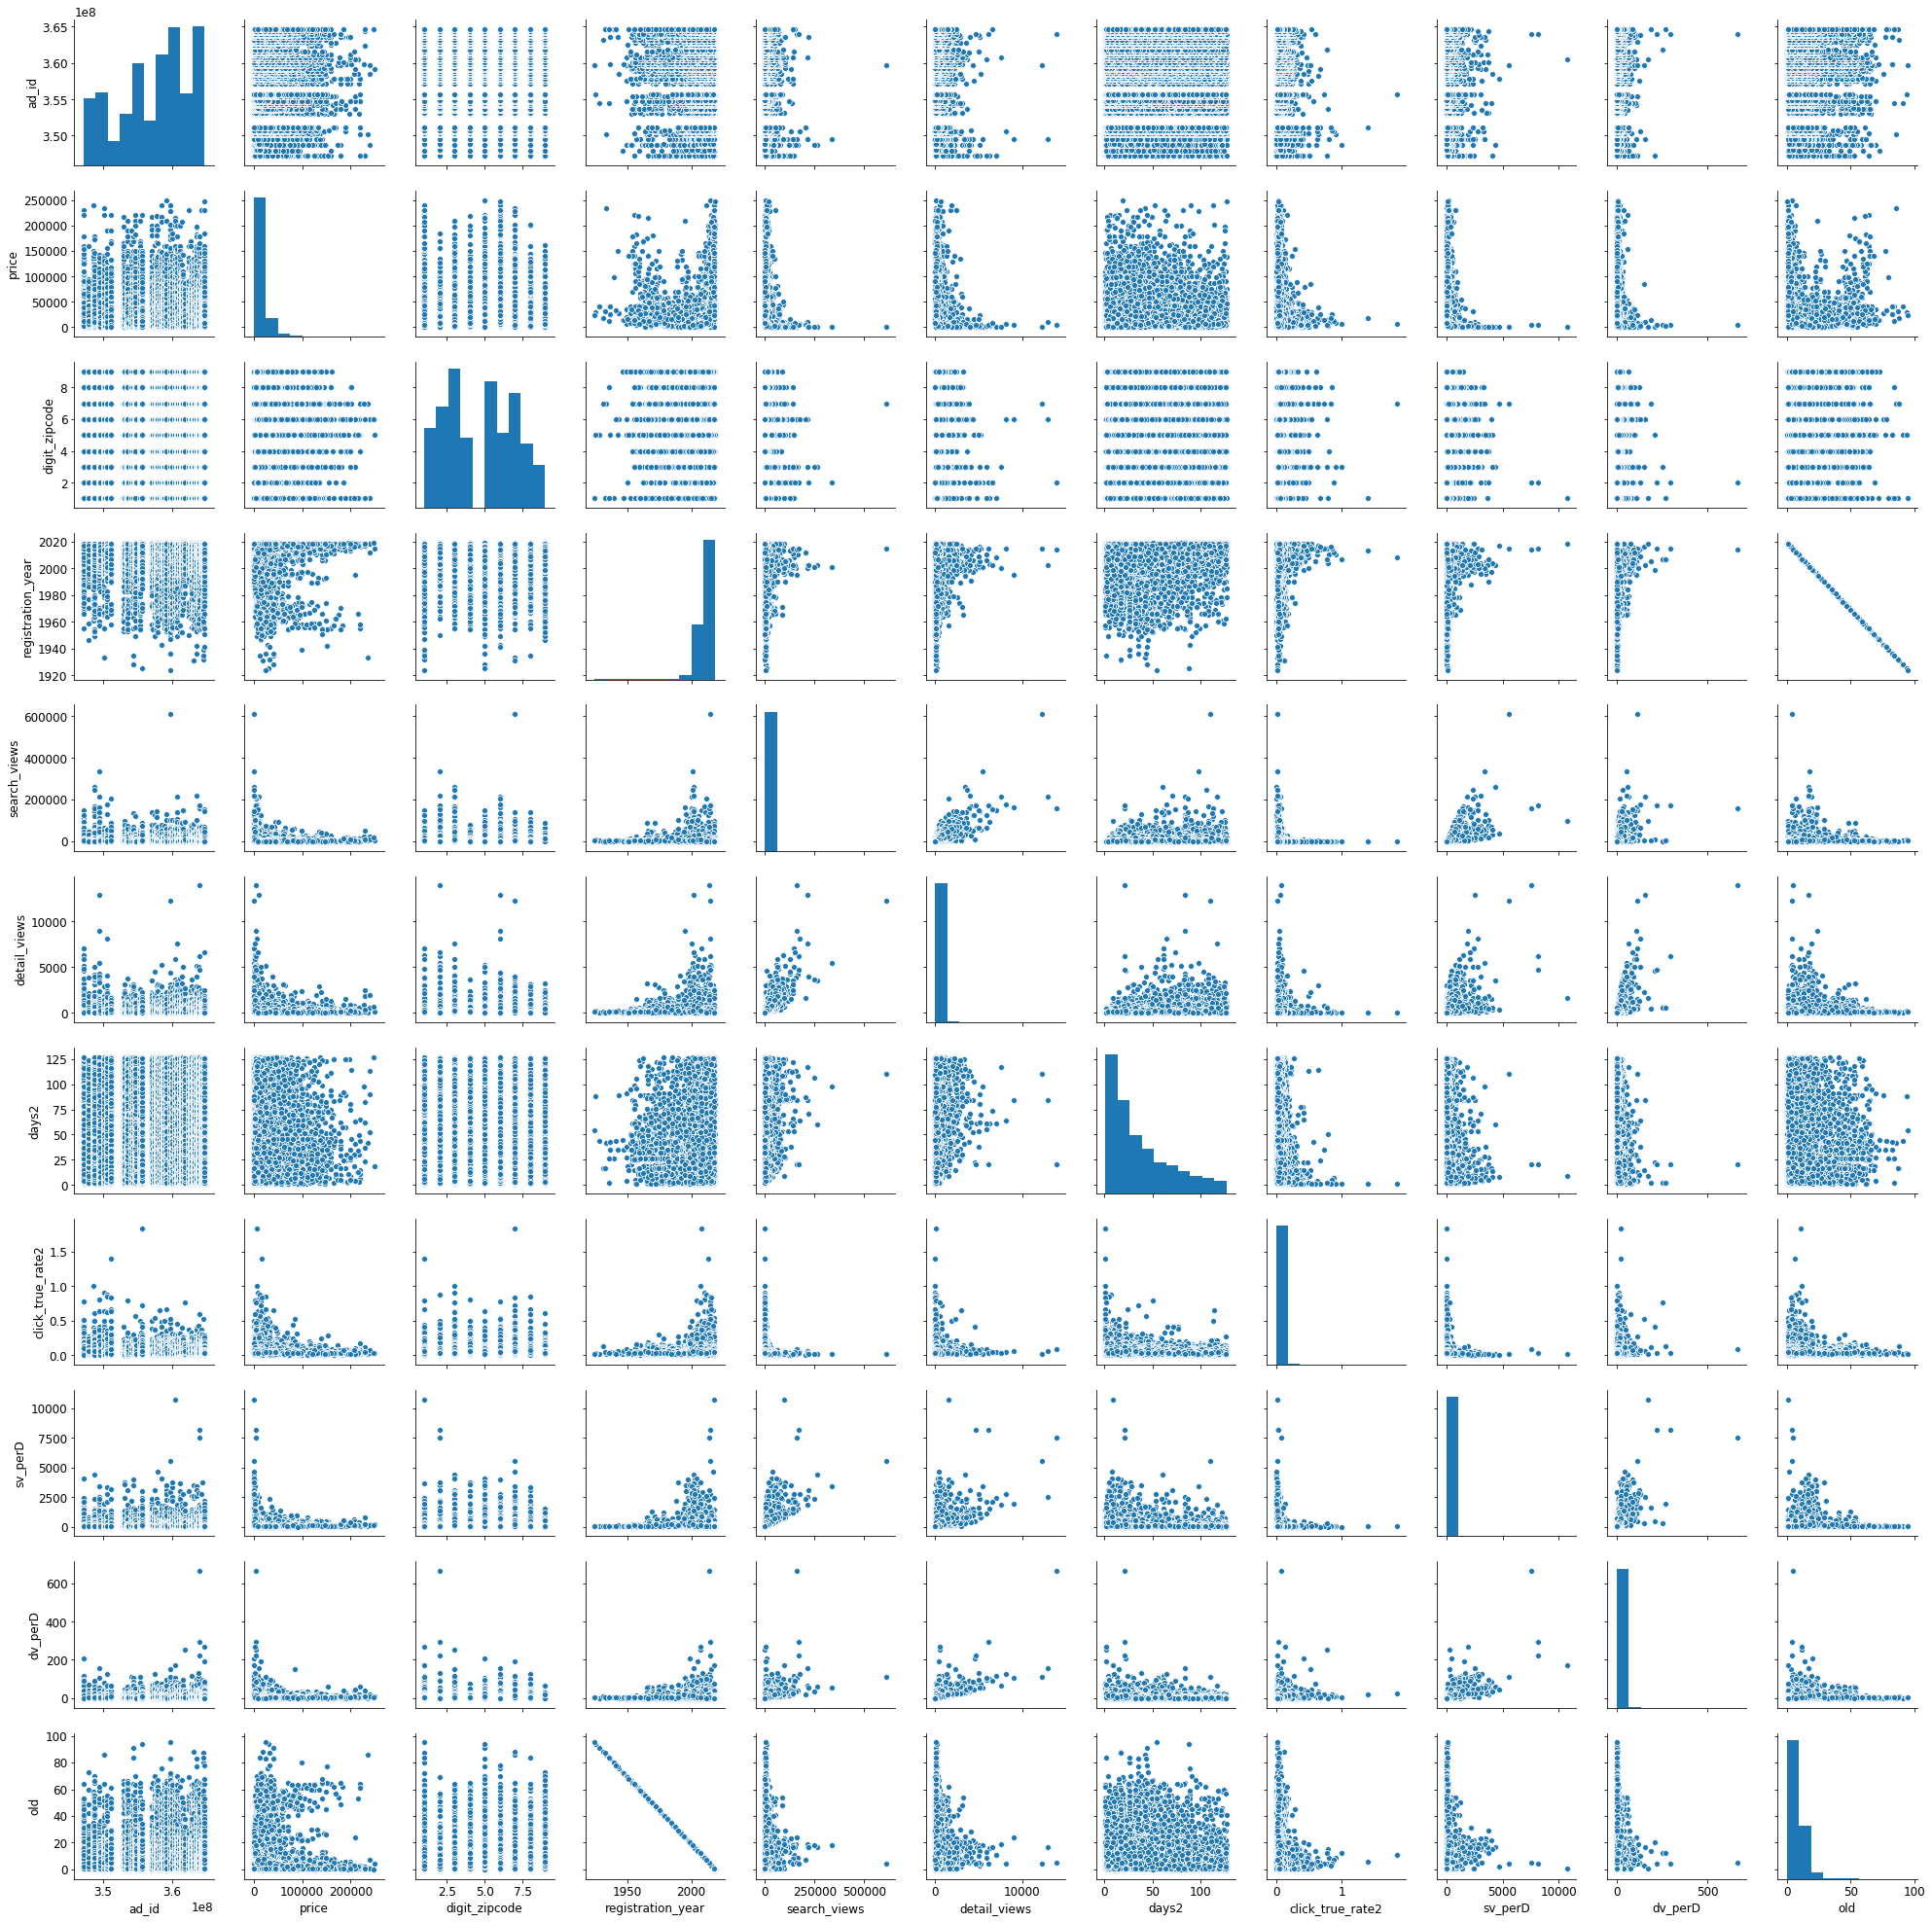

In [52]:
sns.pairplot(data)

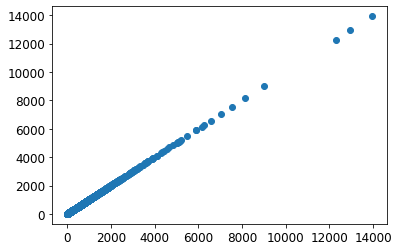

In [53]:
plt.scatter(data.detail_views,data.detail_views)

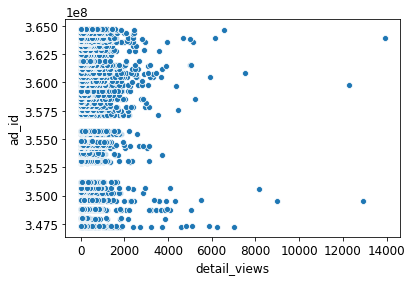

In [54]:
sns.scatterplot(data.detail_views,data.ad_id)

In [55]:
num = 880
print(len(data[data.detail_views > num]))
print(len(data.detail_views))
print("Percentage: {}%".format(round((len(data[data.detail_views > num]))/(len(data.detail_views)),7)))

797
78305
Percentage: 0.0101781%


Adverts with higher views than 880 are removed.

In [56]:
data = data[data.detail_views <= 880]

In [57]:
man_name_count = data.groupby('man_name').ad_id.count()

In [58]:
man_name_count_sort = man_name_count.sort_values(ascending=False)

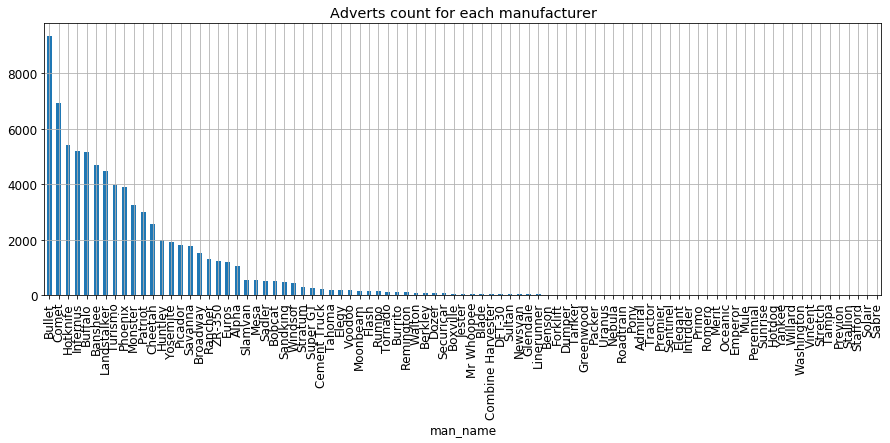

In [59]:
fig = plt.figure(figsize=(15,5))
ax = plt.axes()
ax.set_title('Adverts count for each manufacturer')
ax.set_ylabel('')
man_name_count_sort.plot(kind='bar',grid=True)

In [60]:
num = 100
cut = man_name_count_sort[man_name_count_sort < num].sum()
whole = man_name_count.sum()
print(cut)
print(whole)
print(cut/whole)

895
77508
0.011547195128244826


Also manufacturers with count of advertisement less than 100 are removed for data modeling.

In [61]:
data = data[~data.man_name.isin((man_name_count_sort[man_name_count_sort < num]).keys())]

# Data preparation for Machine Learning modeling

In [63]:
data = pd.concat([data.drop('product_type',axis=1),pd.get_dummies(data.product_type)],axis=1)

Dropping unecesery columns: <br>
- advertisement id (ad_id) - this is probably autogenerated serial number so it dosen't include any useful information for modeling
- Basic - it's arbitraly choose, Plus or Premium could be dropped. I am dropping this column becasue we have this information in rest two columns. Our advertisement cann't samoteinously?? be in two categories e.g. when we have information that advertisement is neither in Plus nor Premium category so it is in Basic. So we are loosing data but not an information. This done according to approch in this article: [link]('https://medium.com/@saurav9786/dummy-variable-trap-c6d4a387f10a' 'Dummy variable trap')

In [64]:
data.drop('ad_id',axis=1, inplace=True)

In [65]:
data.drop('Basic',axis=1,inplace=True)

Reordering columns for beter view

In [65]:
data.columns

Index(['man_name', 'price', 'digit_zipcode', 'registration_year',
       'created_date', 'end_date', 'search_views', 'detail_views', 'days2',
       'click_true_rate2', 'sv_perD', 'dv_perD', 'old', 'Plus', 'Premium'],
      dtype='object')

In [66]:
cols = ['Plus', 'Premium','man_name', 'price', 'digit_zipcode', 'registration_year','old',
       'created_date', 'end_date', 'search_views', 'detail_views',
       'days2', 'click_true_rate2', 'dv_perD', 'sv_perD']

In [67]:
data = data[cols]

In [68]:
data.head()

,Plus,Premium,man_name,price,digit_zipcode,registration_year,old,created_date,end_date,search_views,detail_views,days2,click_true_rate2,dv_perD,sv_perD
38868,0,0,Huntley,6850,7,2005,14,2018-07-04,2018-07-13,297.0,22.0,10.0,0.074074,2.200000,29.700000
29915,0,0,Hotknife,850,5,2004,15,2018-07-04,2018-08-14,3920.0,276.0,42.0,0.070408,6.571429,93.333333
45555,0,0,Banshee,16950,7,2013,6,2018-07-04,2018-09-15,1564.0,118.0,74.0,0.075448,1.594595,21.135135
77759,0,0,Broadway,2995,6,2010,9,2018-07-04,2018-07-16,2372.0,183.0,13.0,0.077150,14.076923,182.461538
72821,0,0,Phoenix,4300,4,2008,11,2018-07-04,2018-10-01,3215.0,208.0,90.0,0.064697,2.311111,35.722222


In [69]:
data.shape

(76613, 15)

When fisrt step of data labeling is over, now it's time for the rest of dataframe. This will easy step thanks to LabelEncoder. 
Labeling a data is esential for couple reasons model will has normalized structers of data, it means that if every column has a different range of data e.g one 1-10000, second 0-1, third in 1-100, after labeling values will be resized into range from 0 to 1, 0.012, 0,3489, 0.9863 etc. So model will have a filling how change in this variable can impact on prediction and also with structured data in this way models calulates faster.  

In [70]:
data2 = data.copy()

In [72]:
data3 = data.copy()

In [72]:
from sklearn.preprocessing import LabelEncoder
le_makename = LabelEncoder()

In [73]:
data.man_name = le_makename.fit_transform(data.man_name)

In [74]:
data = data.apply(LabelEncoder().fit_transform)

Copying dataframe for future modeling.

In [70]:
data2 = data.copy()

In [72]:
data3 = data.copy()

# Modeling

In [66]:
data.columns

Index(['man_name', 'price', 'digit_zipcode', 'registration_year',
       'created_date', 'end_date', 'search_views', 'detail_views', 'days2',
       'click_true_rate2', 'sv_perD', 'dv_perD', 'old', 'Plus', 'Premium'],
      dtype='object')

My goal is to see how much this data can describe how advert will be shown in detail.
This model will be usefull in therm of encouragment of user to buy Plus or Premium option for better advertisement performance. 
I choose to drop columns which contains future data as: <br>
- detail/search view per day
- stock days
- create date / end date <br>

But I decided to keep click true because in database is no specific detail information about given car such as: model, gearbox type, car type etc.  

# Random forest

In [75]:
predictors_drop = ['dv_perD','sv_perD','detail_views','search_views','days2', 'search_views', 'detail_views']
X=data.drop(predictors_drop,axis=1)
y=data.detail_views

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [78]:
from sklearn.preprocessing import StandardScaler 

In [79]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [82]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics
from sklearn import metrics

In [83]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 45.028099588853365
Mean Squared Error: 6720.193962709652
Root Mean Squared Error: 81.97678917053078


In [84]:
regressor.score(X_test, y_test)

0.4858645716042788

## XGBoost

In [85]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [86]:
params = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,5)],  'subsample':[i/10.0 for i in range(6,9)], 
          'colsample_bytree':[i/10.0 for i in range(6,9)], 'max_depth': [2,3,4]}

gbm = xgb.XGBRegressor(learning_rate=0.02, n_estimators=600, objective='reg:squarederror', silent=True, nthread=-1)

In [87]:
grid = GridSearchCV(param_grid=params, estimator=gbm,cv=3, verbose=1)

In [88]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a futur

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaco

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaco

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaco

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaco

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaco

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaco

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaco

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.02,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=600, n_jobs=1, nthread=-1,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=True,
                                    subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8],
                         'gamma': [0.3, 0.4], 'max_dept

In [89]:
from sklearn.metrics import r2_score

In [90]:
print(r2_score(y_test, grid.best_estimator_.predict(X_test))) 

0.49761822249946897


# Polynomial regression

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
lin = LinearRegression() 
  
transformer = PolynomialFeatures(degree=3, include_bias=False)

In [92]:
transformer.fit(X)

PolynomialFeatures(degree=3, include_bias=False, interaction_only=False,
                   order='C')

In [93]:
X_ = transformer.transform(X)
model = LinearRegression().fit(X_, y)
r_sq = model.score(X_, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.5005641172226007


In [96]:
transformer = PolynomialFeatures(degree=4)
transformer.fit(X)
X_ = transformer.transform(X)
model = LinearRegression().fit(X_, y)
r_sq = model.score(X_, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.5230310106029359


##  Summary

What is the impact of more expensive products on the effectiveness of an advertisement?
Are there patterns in the data that you would find interesting or unexpected?
What additional data could be used in the analysis?

  
After data exploration we can see that advertisments with bought more expensive variants have better statistics in Detail and Search views section. Also cars annouced on this page can be classificated as antiques in most part, so maybe there should be given a bonus for buyng higher variant for those types of clients after showing some kind of proof, or should be created new variant. 
As we can see there is a huge opportunity for increasing page profitability with increasing Plus or Premium sales. Even with database which contains very basic information we can describe behavior of details views in 52%, so if there will be more data e.g.:
- car model,
- car type,
- miliage,
- gearbox type,
- engine,
- diesel/gasoline/gas
- etc. <br>

We could create more precise model which could predict potenial increace of details views. This information could be shown on page in the step of choosing advertisement type and this could encourage sellers to buy Premium or Plus more efectively than showing information without any statistics.